In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

604

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key


In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key


In [10]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
    
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
         # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass


# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------") 
        


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | itapetininga
Processing Record 2 of Set 1 | vardo
Processing Record 3 of Set 1 | monrovia
Processing Record 4 of Set 1 | port-gentil
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | atherton
Processing Record 7 of Set 1 | bethel
Processing Record 8 of Set 1 | cape town
Processing Record 9 of Set 1 | nouadhibou
Processing Record 10 of Set 1 | qaanaaq
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | esperance
Processing Record 13 of Set 1 | new norfolk
Processing Record 14 of Set 1 | anadyr
Processing Record 15 of Set 1 | montijo
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | mahajanga
Processing Record 18 of Set 1 | kavaratti
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | bredasdorp
Processing Record 21 of Set 1 | dhuwaran
Processing Record 22 of Set 1 | khatanga
Processing Record 23 of Set 1 | saint-augu

Processing Record 36 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 37 of Set 4 | tepecoacuilco
City not found. Skipping...
Processing Record 38 of Set 4 | sistranda
Processing Record 39 of Set 4 | cidreira
Processing Record 40 of Set 4 | thompson
Processing Record 41 of Set 4 | saint-philippe
Processing Record 42 of Set 4 | hobyo
Processing Record 43 of Set 4 | dingle
Processing Record 44 of Set 4 | evensk
Processing Record 45 of Set 4 | sao filipe
Processing Record 46 of Set 4 | antofagasta
Processing Record 47 of Set 4 | albany
Processing Record 48 of Set 4 | bosaso
Processing Record 49 of Set 4 | kenai
Processing Record 50 of Set 4 | bathsheba
Processing Record 1 of Set 5 | souillac
Processing Record 2 of Set 5 | hami
Processing Record 3 of Set 5 | ler
Processing Record 4 of Set 5 | tasiilaq
Processing Record 5 of Set 5 | port lincoln
Processing Record 6 of Set 5 | richards bay
Processing Record 7 of Set 5 | tsihombe
City not found. Skipping...
Processing Reco

Processing Record 26 of Set 8 | ilinsko-podomskoye
City not found. Skipping...
Processing Record 27 of Set 8 | maindargi
Processing Record 28 of Set 8 | fortuna
Processing Record 29 of Set 8 | semporna
Processing Record 30 of Set 8 | valenca
Processing Record 31 of Set 8 | bonga
Processing Record 32 of Set 8 | coffs harbour
Processing Record 33 of Set 8 | guiglo
Processing Record 34 of Set 8 | kiama
Processing Record 35 of Set 8 | villafranca de los barros
Processing Record 36 of Set 8 | mehamn
Processing Record 37 of Set 8 | ust-karsk
Processing Record 38 of Set 8 | zarubino
Processing Record 39 of Set 8 | mozhga
Processing Record 40 of Set 8 | marmora
Processing Record 41 of Set 8 | marzuq
Processing Record 42 of Set 8 | shingu
Processing Record 43 of Set 8 | port hedland
Processing Record 44 of Set 8 | kidal
Processing Record 45 of Set 8 | alofi
Processing Record 46 of Set 8 | faanui
Processing Record 47 of Set 8 | sampit
Processing Record 48 of Set 8 | buraydah
Processing Record 49

Processing Record 12 of Set 12 | manali
Processing Record 13 of Set 12 | sambava
Processing Record 14 of Set 12 | saint paul
Processing Record 15 of Set 12 | ahipara
Processing Record 16 of Set 12 | ilulissat
Processing Record 17 of Set 12 | vila velha
Processing Record 18 of Set 12 | vao
Processing Record 19 of Set 12 | brodokalmak
Processing Record 20 of Set 12 | risod
Processing Record 21 of Set 12 | shirgaon
Processing Record 22 of Set 12 | chilca
Processing Record 23 of Set 12 | cosamaloapan
Processing Record 24 of Set 12 | tabas
Processing Record 25 of Set 12 | swan hill
Processing Record 26 of Set 12 | santa cruz de la palma
Processing Record 27 of Set 12 | qaqortoq
Processing Record 28 of Set 12 | rio gallegos
Processing Record 29 of Set 12 | tatawin
Processing Record 30 of Set 12 | antalaha
Processing Record 31 of Set 12 | rincon
Processing Record 32 of Set 12 | geraldton
Processing Record 33 of Set 12 | sulangan
Processing Record 34 of Set 12 | necochea
Processing Record 35 o

In [14]:
len(city_data)

576

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Itapetininga,-23.5917,-48.0531,15.36,96,100,4.81,BR,2022-04-01 13:18:05
1,Vardo,70.3705,31.1107,-5.01,74,0,6.17,NO,2022-04-01 13:18:05
2,Monrovia,6.3005,-10.7969,32.87,68,43,3.84,LR,2022-04-01 13:18:02
3,Port-Gentil,-0.7193,8.7815,26.74,83,100,5.74,GA,2022-04-01 13:18:05
4,Bluff,-46.6000,168.3333,9.14,77,9,3.51,NZ,2022-04-01 13:18:06
5,Atherton,53.5237,-2.4935,9.05,56,100,1.79,GB,2022-04-01 13:18:06
6,Bethel,41.3712,-73.4140,10.67,90,75,1.54,US,2022-04-01 13:18:06
7,Cape Town,-33.9258,18.4232,25.06,67,0,12.86,ZA,2022-04-01 13:15:15
8,Nouadhibou,20.9310,-17.0347,28.99,24,4,6.17,MR,2022-04-01 13:18:06
9,Qaanaaq,77.4840,-69.3632,-6.30,94,99,3.06,GL,2022-04-01 13:18:07


In [16]:
# Reorder the column order
new_column_order = ["City", "Country", "Date", "Lat","Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [17]:
city_data_df = city_data_df[new_column_order]

In [18]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Itapetininga,BR,2022-04-01 13:18:05,-23.5917,-48.0531,15.36,96,100,4.81
1,Vardo,NO,2022-04-01 13:18:05,70.3705,31.1107,-5.01,74,0,6.17
2,Monrovia,LR,2022-04-01 13:18:02,6.3005,-10.7969,32.87,68,43,3.84
3,Port-Gentil,GA,2022-04-01 13:18:05,-0.7193,8.7815,26.74,83,100,5.74
4,Bluff,NZ,2022-04-01 13:18:06,-46.6000,168.3333,9.14,77,9,3.51
...,...,...,...,...,...,...,...,...,...
571,Santiago Del Estero,AR,2022-04-01 13:16:44,-27.7951,-64.2615,15.36,36,0,2.87
572,Sioux Lookout,CA,2022-04-01 13:20:18,50.1001,-91.9170,-11.96,92,100,2.06
573,Roma,US,2022-04-01 13:18:03,43.2128,-75.4557,6.64,79,100,4.63
574,Neuquen,AR,2022-04-01 13:15:56,-38.9516,-68.0591,13.94,35,0,3.09


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

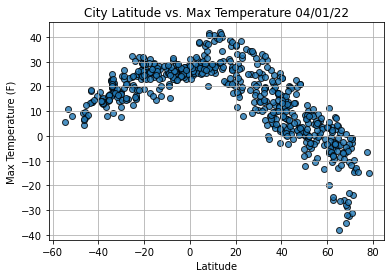

In [22]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

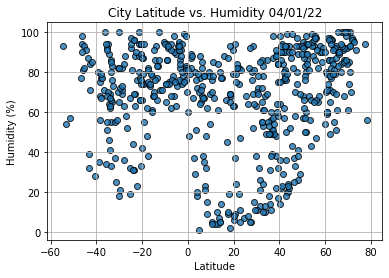

In [23]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

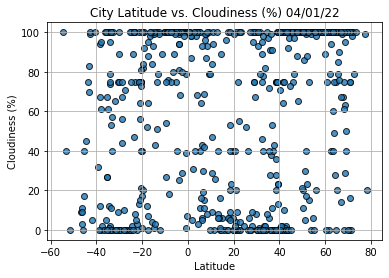

In [24]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

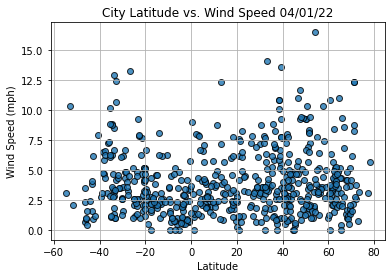

In [25]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [27]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [28]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Vardo,NO,2022-04-01 13:18:05,70.3705,31.1107,-5.01,74,0,6.17
2,Monrovia,LR,2022-04-01 13:18:02,6.3005,-10.7969,32.87,68,43,3.84
5,Atherton,GB,2022-04-01 13:18:06,53.5237,-2.4935,9.05,56,100,1.79
6,Bethel,US,2022-04-01 13:18:06,41.3712,-73.4140,10.67,90,75,1.54
8,Nouadhibou,MR,2022-04-01 13:18:06,20.9310,-17.0347,28.99,24,4,6.17


In [29]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

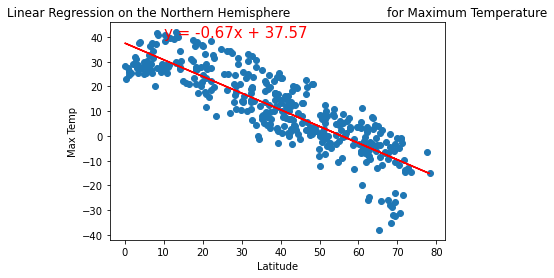

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

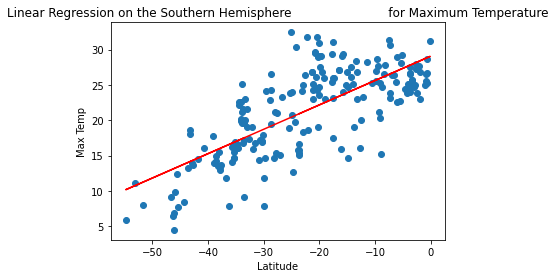

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

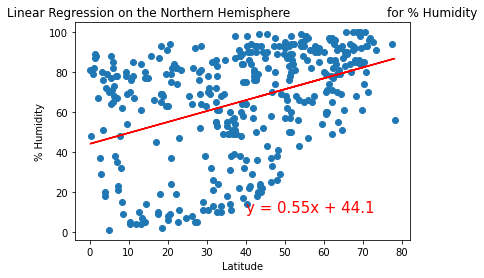

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

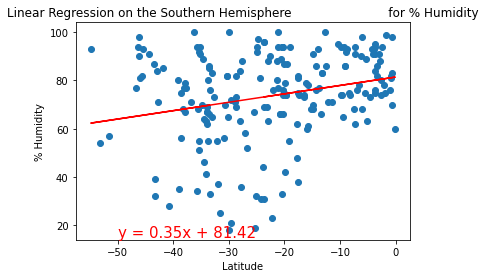

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

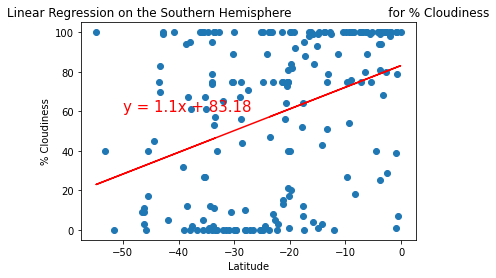

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

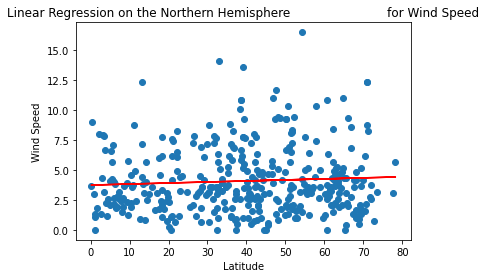

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

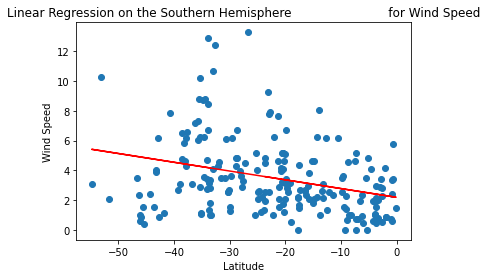

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))